In [44]:
# This program uses MiniConda Python 3.8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

0.9899999999999999
0.02511848653766051
0.8086446224041319


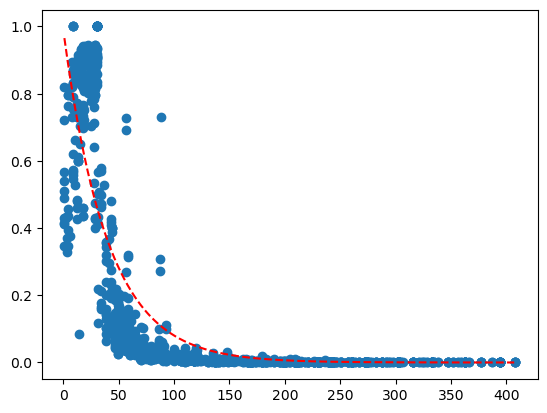

In [45]:
def func(x, a, b):
    return a * np.exp(-b * x)
# Load Bayer Curves

all_coupons = pd.read_csv('G:/My Drive/bayer_curves.csv')

sun_fsi = all_coupons[all_coupons["Media_Type"] == "SUNDAY FSI"]
np_sun_fsi = sun_fsi[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype = float)

x = np_sun_fsi[:,0]
y = np_sun_fsi[:,1]

popt, pcov = cf(func, x, y, bounds = (0, [.99, .05]))

res = y - func(x, *popt)
ss_r = np.sum(res**2)
ss_tot = np.sum((y - np.mean(y)**2))
r_sq = 1 - (ss_r / ss_tot)
print(r_sq)

x_est = np.arange(min(x), max(x))
y_est = func(x_est, *popt)

plt.figure()
plt.scatter(x, y)
plt.plot(x_est, y_est, '--', color = 'red')
plt.show()